# Fake News Detection using NLP

### installing Natural language Toolkit

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import nltk
import pandas as pd

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yashmanmode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
fake_data = pd.read_csv('Fake.csv')
true_data = pd.read_csv('True.csv')

In [15]:
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [16]:
true_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [17]:
#Labeling the data on the basis of genuineness
fake_data['genuine'] = 0;
true_data['genuine'] = 1;

In [18]:
# Concatinating both the dataset for training  
dataset1 = pd.concat([fake_data, true_data])

In [19]:
dataset1

,title,text,subject,date,genuine
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


## Pre-Processing 

In [20]:
#we are removing useless coloumn like Data,Title, Subject 
dataset1 = dataset1.reset_index(drop = True)
dataset1 = dataset1.drop(['date', 'title', 'subject'], axis=1)

In [21]:
dataset1

,text,genuine
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [24]:
#Importing tonenizer to tokenize each word in the sentence
from nltk.tokenize import word_tokenize
dataset1['text'] = dataset1['text'].apply(word_tokenize)

In [25]:
dataset1

,text,genuine
0,"[Donald, Trump, just, couldn, t, wish, all, Am...",0
1,"[House, Intelligence, Committee, Chairman, Dev...",0
2,"[On, Friday, ,, it, was, revealed, that, forme...",0
3,"[On, Christmas, day, ,, Donald, Trump, announc...",0
4,"[Pope, Francis, used, his, annual, Christmas, ...",0
...,...,...
44893,"[BRUSSELS, (, Reuters, ), -, NATO, allies, on,...",1
44894,"[LONDON, (, Reuters, ), -, LexisNexis, ,, a, p...",1
44895,"[MINSK, (, Reuters, ), -, In, the, shadow, of,...",1
44896,"[MOSCOW, (, Reuters, ), -, Vatican, Secretary,...",1


In [26]:
#importing snowball stemming for stemming all the tokens 
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer('english')

In [29]:
#function for stemming process
def stem_it(text):
    return [sb.stem(word) for word in text]

In [30]:
dataset1['text'] = dataset1['text'].apply(stem_it)

In [31]:
dataset1

,text,genuine
0,"[donald, trump, just, couldn, t, wish, all, am...",0
1,"[hous, intellig, committe, chairman, devin, nu...",0
2,"[on, friday, ,, it, was, reveal, that, former,...",0
3,"[on, christma, day, ,, donald, trump, announc,...",0
4,"[pope, franci, use, his, annual, christma, day...",0
...,...,...
44893,"[brussel, (, reuter, ), -, nato, alli, on, tue...",1
44894,"[london, (, reuter, ), -, lexisnexi, ,, a, pro...",1
44895,"[minsk, (, reuter, ), -, in, the, shadow, of, ...",1
44896,"[moscow, (, reuter, ), -, vatican, secretari, ...",1


In [32]:
#function for stop word removal
def stopword_removal(text):
    return [word for word in text if len(word)>2]

In [33]:
dataset1['text'] = dataset1['text'].apply(stopword_removal)

In [34]:
dataset1

,text,genuine
0,"[donald, trump, just, couldn, wish, all, ameri...",0
1,"[hous, intellig, committe, chairman, devin, nu...",0
2,"[friday, was, reveal, that, former, milwauke, ...",0
3,"[christma, day, donald, trump, announc, that, ...",0
4,"[pope, franci, use, his, annual, christma, day...",0
...,...,...
44893,"[brussel, reuter, nato, alli, tuesday, welcom,...",1
44894,"[london, reuter, lexisnexi, provid, legal, reg...",1
44895,"[minsk, reuter, the, shadow, disus, soviet-era...",1
44896,"[moscow, reuter, vatican, secretari, state, ca...",1


In [35]:
#Using join function to join all the words after stemming
dataset1['text'] = dataset1['text'].apply(' '.join)

In [36]:
dataset1

,text,genuine
0,donald trump just couldn wish all american hap...,0
1,hous intellig committe chairman devin nune hav...,0
2,friday was reveal that former milwauke sheriff...,0
3,christma day donald trump announc that would b...,0
4,pope franci use his annual christma day messag...,0
...,...,...
44893,brussel reuter nato alli tuesday welcom presid...,1
44894,london reuter lexisnexi provid legal regulator...,1
44895,minsk reuter the shadow disus soviet-era facto...,1
44896,moscow reuter vatican secretari state cardin p...,1


## Model Creation

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset1['text'], dataset1['genuine'], test_size = 0.3,
                                                    random_state = 10)

In [43]:
x_train

3344     president-elect donald trump said isn interest...
21000    wow hard believ the german govern could cruel ...
39230    nairobi reuter kenya opposit coalit has ask su...
13373    last thursday dure hillari accept speech the d...
33733    washington reuter republican presidenti candid...
                               ...                        
40059    tokyo reuter japan prime minist shinzo abe may...
28017    reuter highlight the day for u.s. presid donal...
29199    reuter the republican-control iowa state senat...
40061    beij reuter china rule communist parti enshrin...
17673    should legal gun owner allow freeli carri anyw...
Name: text, Length: 31428, dtype: object

In [45]:
# using Term frequency Vectorizer for vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_df = 0.7)

In [46]:
tf_train = tf.fit_transform(x_train)
tf_test = tf.transform(x_test)

In [48]:
print(tf_train)

  (0, 33434)	0.04611117581524918
  (0, 70801)	0.14430244080161841
  (0, 60100)	0.12554054835918715
  (0, 83628)	0.03179401126889168
  (0, 39446)	0.03388053924625078
  (0, 28675)	0.0632657380570561
  (0, 31149)	0.05558325938148595
  (0, 46251)	0.08355393374279445
  (0, 50053)	0.07801583811162095
  (0, 6935)	0.022586792419271556
  (0, 86495)	0.060761484228430786
  (0, 42255)	0.07455859322342662
  (0, 63308)	0.048694874968640126
  (0, 79552)	0.07100177966246517
  (0, 78064)	0.05317362602070752
  (0, 83531)	0.1294339928197098
  (0, 59644)	0.08587022764437378
  (0, 40434)	0.06684032952159889
  (0, 85541)	0.024001521749962933
  (0, 60772)	0.11313961199273476
  (0, 52470)	0.0747378664052828
  (0, 451)	0.10246632512525919
  (0, 29072)	0.06141192761286538
  (0, 73884)	0.06074737912596364
  (0, 40718)	0.028650435581500128
  :	:
  (31427, 87680)	0.014090224347891516
  (31427, 23271)	0.03174160121530383
  (31427, 30815)	0.015597970357101728
  (31427, 48403)	0.018434879643432045
  (31427, 76155)	0.

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [60]:
lr = LogisticRegression(max_iter = 1500)
lr.fit(tf_train, y_train)

LogisticRegression(max_iter=1500)

In [61]:
y_pred = lr.predict(tf_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

98.78990348923534

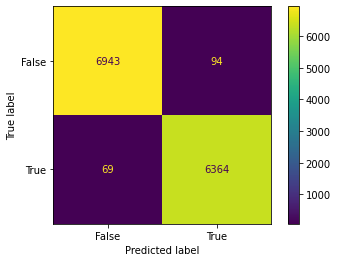

In [63]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Passive Agressive Classifier

In [84]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(max_iter = 1000)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier()

In [85]:
y_pred_pac = pac.predict(tf_test)
accuracy_score(y_test, y_pred_pac)*100

99.60653303637713

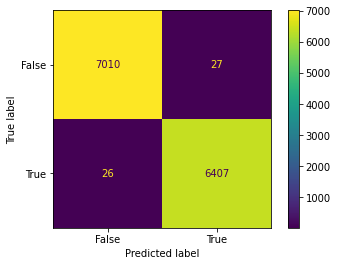

In [87]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_pac)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()